<a href="https://colab.research.google.com/github/pedro-zappa/MVP_Sprint_I/blob/main/MVP_Sprint_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

Pretendemos criar um dataset a partir do Data Bank de World Development Indicators, do Banco Mundial para implementar um modelo de aprendizado não supervisionado de classificação.

Neste tipo de técnica, o modelo é treinado para identificar padrões ou estruturas nos dados sem ter rótulos explícitos para as classes, como no presente dataset.

Diferentemente do aprendizado supervisionado, no qual os algoritmos são treinados em um conjunto de dados rotulado com pares de entrada e saída desejados, o aprendizado não supervisionado trabalha com dados não rotulados.

A classificação não supervisionada é frequentemente usada para descobrir agrupamentos naturais ou estruturas nos dados. Neste trabalho, gostaríamos de identificar se as séries escolhidas ajudam a explicar clusters de países em diversos níveis de desenvolvimento.

O dataset inicialmente obtido possui 19 séries com indicadores separados por país (coluna 'Country') e ano (coluna 'Year'), conforme detalhado a seguir:

>1. **Control of Corruption:** Control of Corruption captures perceptions of the extent to which public power is exercised for private gain, including both petty and grand forms of corruption, as well as "capture" of the state by elites and private interests. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. *__ranging from approximately -2.5 to 2.5.__*
2. **GDP current - USD:** GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.
3. **GDP growth - % annual:**	Annual percentage growth rate of GDP at market prices based on constant local currency. Aggregates are based on constant 2015 prices, expressed in U.S. dollars.
4. **GDP per capita:** This indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. conversion factor is a spatial price deflator and currency converter that controls for price level differences between countries. Total population is a mid-year population based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.
5. **Government expenditure on education - total % of GDP:** General government expenditure on education (current, capital, and transfers) is expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government. General government usually refers to local, regional and central governments.
6. **Inflation, GDP deflator:**	Inflation as measured by the annual growth rate of the GDP implicit deflator shows the rate of price change in the economy as a whole. The GDP implicit deflator is the ratio of GDP in current local currency to GDP in constant local currency.
7. **Labor force with advanced education:** The ratio of the labor force with advanced education to the working-age population with advanced education. Advanced education comprises short-cycle tertiary education, a bachelor’s degree or equivalent education level, a master’s degree or equivalent education level, or doctoral degree or equivalent education level according to the International Standard Classification of Education 2011 (ISCED 2011).
8. **Life expectancy at birth, total (years):** Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.
9. **Market capitalization of listed domestic companies (% of GDP):**Market capitalization (also known as market value) is the share price times the number of shares outstanding (including their several classes) for listed domestic companies. Investment funds, unit trusts, and companies whose only business goal is to hold shares of other listed companies are excluded. Data are end of year values.
10. **Political Stability and Absence of Violence/Terrorism:** Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, *__ranging from approximately -2.5 to 2.5.__*
11. **Poverty headcount ratio at USD 3.65 a day (2017 PPP):** 	Poverty headcount ratio at $3.65 a day is the percentage of the population living on less than USD 3.65 a day at 2017 international prices.
12. **Price level ratio of PPP conversion factor (GDP) to market exchange rate:** Price level ratio is the ratio of a purchasing power parity (PPP) conversion factor to an exchange rate. It provides a measure of the differences in price levels between countries by indicating the number of units of the common currency needed to buy the same volume of the aggregation level in each country. At the level of GDP, they provide a measure of the differences in the general price levels of countries.

>>>**Comentário:**
In practical terms, a high Price Level Ratio may suggest that the cost of living or the general price level is higher in one country compared to another when using a common currency. Conversely, a low Price Level Ratio may indicate a lower cost of living or a lower general price level.

13. **Tax revenue (% of GDP):** Tax revenue refers to compulsory transfers to the central government for public purposes. Certain compulsory transfers such as fines, penalties, and most social security contributions are excluded. Refunds and corrections of erroneously collected tax revenue are treated as negative revenue.
14. **Trade (% of GDP):** Trade is the sum of exports and imports of goods and services measured as a share of gross domestic product.
15. **Trade in services (% of GDP):** Trade in services is the sum of service exports and imports divided by the value of GDP, all in current U.S. dollars.
16. **Unemployment, total (% of total labor force):** Unemployment refers to the share of the labor force that is without work but available for and seeking employment.
17. **Urban population:** Urban population refers to people living in urban areas as defined by national statistical offices. It is calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects. Aggregation of urban and rural population may not add up to total population because of different country coverages.

>>>**Comentário:**
Explosive growth of cities globally signifies the demographic transition from rural to urban, and is associated with shifts from an agriculture-based economy to mass industry, technology, and service. In principle, cities offer a more favorable setting for the resolution of social and environmental problems than rural areas. Cities generate jobs and income, and deliver education, health care and other services. Cities also present opportunities for social mobilization and women's empowerment.

18. **Urban population (% of total population)**
19. **Urban population growth (annual %)**

# Importação de Dados

## Nesta etapa iremos importar as bibliotecas necessárias para o trabalho e o dataset, que está salvo no GDRIVE.




In [34]:
# imports necessários
import warnings
warnings.filterwarnings("ignore")

# import para uso do Google Drive
!pip install gdown
import gdown
from google.colab import drive

# Importação de pacotes
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

## Não será necessário realizar Transformações Categóricas


In [35]:
file_id = "1qeemQmxoasekgqXyalMMVLuVf-hgu-mm"
url = f"https://drive.google.com/uc?id={file_id}"

folder_path = "."  # pasta onde baixara o arquivo
os.makedirs(folder_path, exist_ok=True) # cria a pasta de destino se necessário

output = "/world_development_data_imputed.csv"  # especifica o nome do arquivo e a extensão do mesmo
gdown.download(url, output)

# carga do dataset através do arquivo criado
filename = "/world_development_data_imputed.csv"
wdd = pd.read_csv(filename, delimiter=',')

Downloading...
From: https://drive.google.com/uc?id=1qeemQmxoasekgqXyalMMVLuVf-hgu-mm
To: /world_development_data_imputed.csv
100%|██████████| 2.07M/2.07M [00:00<00:00, 171MB/s]


# Limpeza e Pré-processamento

## Verificação do tipo do dataset e visualização das 5 primeiras linhas

In [36]:
# verifica o tipo do dataset
print(type(wdd))

# exibe as 5 primeiras linhas
wdd.head()


<class 'pandas.core.frame.DataFrame'>


Country Name       Series Name    Time        Value
0       Brazil  Urban population  2018.0  181939117.0
1       Brazil  Urban population  2019.0  183878366.0
2       Brazil  Urban population  2020.0  185636418.0
3       Brazil  Urban population  2021.0  187143228.0
4       Brazil  Urban population  2022.0  188517733.0

## O dataset se apresenta no formato longo, iremos transformá-la para o formato largo (wide).


In [37]:
# Create an empty DataFrame to store the results
df_wdd = pd.DataFrame()

for year in range(2018, 2023):
    # Filter the rows of the wdd DataFrame based on the value in the 'Time' column
    wdd_p = wdd[wdd['Time'] == year]

    # Pivot the DataFrame
    wdd_p = wdd_p.pivot(index='Country Name', columns='Series Name', values='Value')

    # Append the 'Year' column to the pivoted DataFrame
    wdd_p['Year'] = year

    # Append the pivoted DataFrame to the result DataFrame
    df_wdd = df_wdd.append(wdd_p)

# Reset the index of the DataFrame and move the index values into a new column
df_wdd = df_wdd.reset_index()

# Rename the new column to the desired name
df_wdd = df_wdd.rename(columns={'index': 'Country Name'})

df_wdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 21 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Country Name                                                                                     1330 non-null   object 
 1   Control of Corruption: Estimate                                                                  1025 non-null   float64
 2   GDP (current US$)                                                                                1256 non-null   float64
 3   GDP growth (annual %)                                                                            1253 non-null   float64
 4   GDP per capita, PPP (constant 2017 international $)                                              1199 non-null   float64
 5   Govern

In [38]:
df_wdd.head()

Series Name                 Country Name  Control of Corruption: Estimate  \
0                            Afghanistan                        -1.502881   
1            Africa Eastern and Southern                              NaN   
2             Africa Western and Central                              NaN   
3                                Albania                        -0.545840   
4                                Algeria                        -0.658660   

Series Name  GDP (current US$)  GDP growth (annual %)  \
0                 1.841886e+10               1.189228   
1                 1.007196e+12               2.513984   
2                 7.670257e+11               2.813142   
3                 1.515642e+10               4.019346   
4                 1.749109e+11               1.200000   

Series Name  GDP per capita, PPP (constant 2017 international $)  \
0                                                  2060.698973     
1                                                  3661.360566     
2                                                  4064.079894     
3                                                 13317.119264     
4                                                 11725.877741     

Series Name  Government expenditure on education, total (% of GDP)  \
0                                                          NaN       
1                                                     0.234451       
2                                                          NaN       
3                                                     3.152945       
4                                                     6.324539       

Series Name  Inflation, GDP deflator: linked series (annual %)  \
0                                                     2.071349   
1                                                          NaN   
2                                                          NaN   
3                                                     1.472953   
4                                                     6.757341   

Series Name  Labor force with advanced education (% of total working-age population with advanced education)  \
0                                                          NaN                                                 
1                                                          NaN                                                 
2                                                          NaN                                                 
3                                                         72.1                                                 
4                                                          NaN                                                 

Series Name  Life expectancy at birth, total (years)  \
0                                          63.081000   
1                                          63.365863   
2                                          57.189139   
3                                          79.184000   
4                                          76.066000   

Series Name  Market capitalization of listed domestic companies (% of GDP)  \
0                                                          NaN               
1                                                          NaN               
2                                                          NaN               
3                                                          NaN               
4                                                     0.212347               

Series Name  ...  \
0            ...   
1            ...   
2            ...   
3            ...   
4            ...   

Series Name  Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)  \
0                                                          NaN                     
1                                                          NaN                     
2                                                          NaN                     
3                              

## Tratamento de Missings

 Como pode ser visto abaixo, verificamos que a quantidade de nulos no dataset é bem elevada, especialmente em relação às séries "Market Capitalization" e "Poverty Headcount".

 Além disso, ao extratir as matrizes de "missing values" individualizando a análise por ano, percebemos que o ano de 2022 possui muitos missings em outras séries, como "Life Expectancy" e "Tax Revenue".



2018


2019


2020


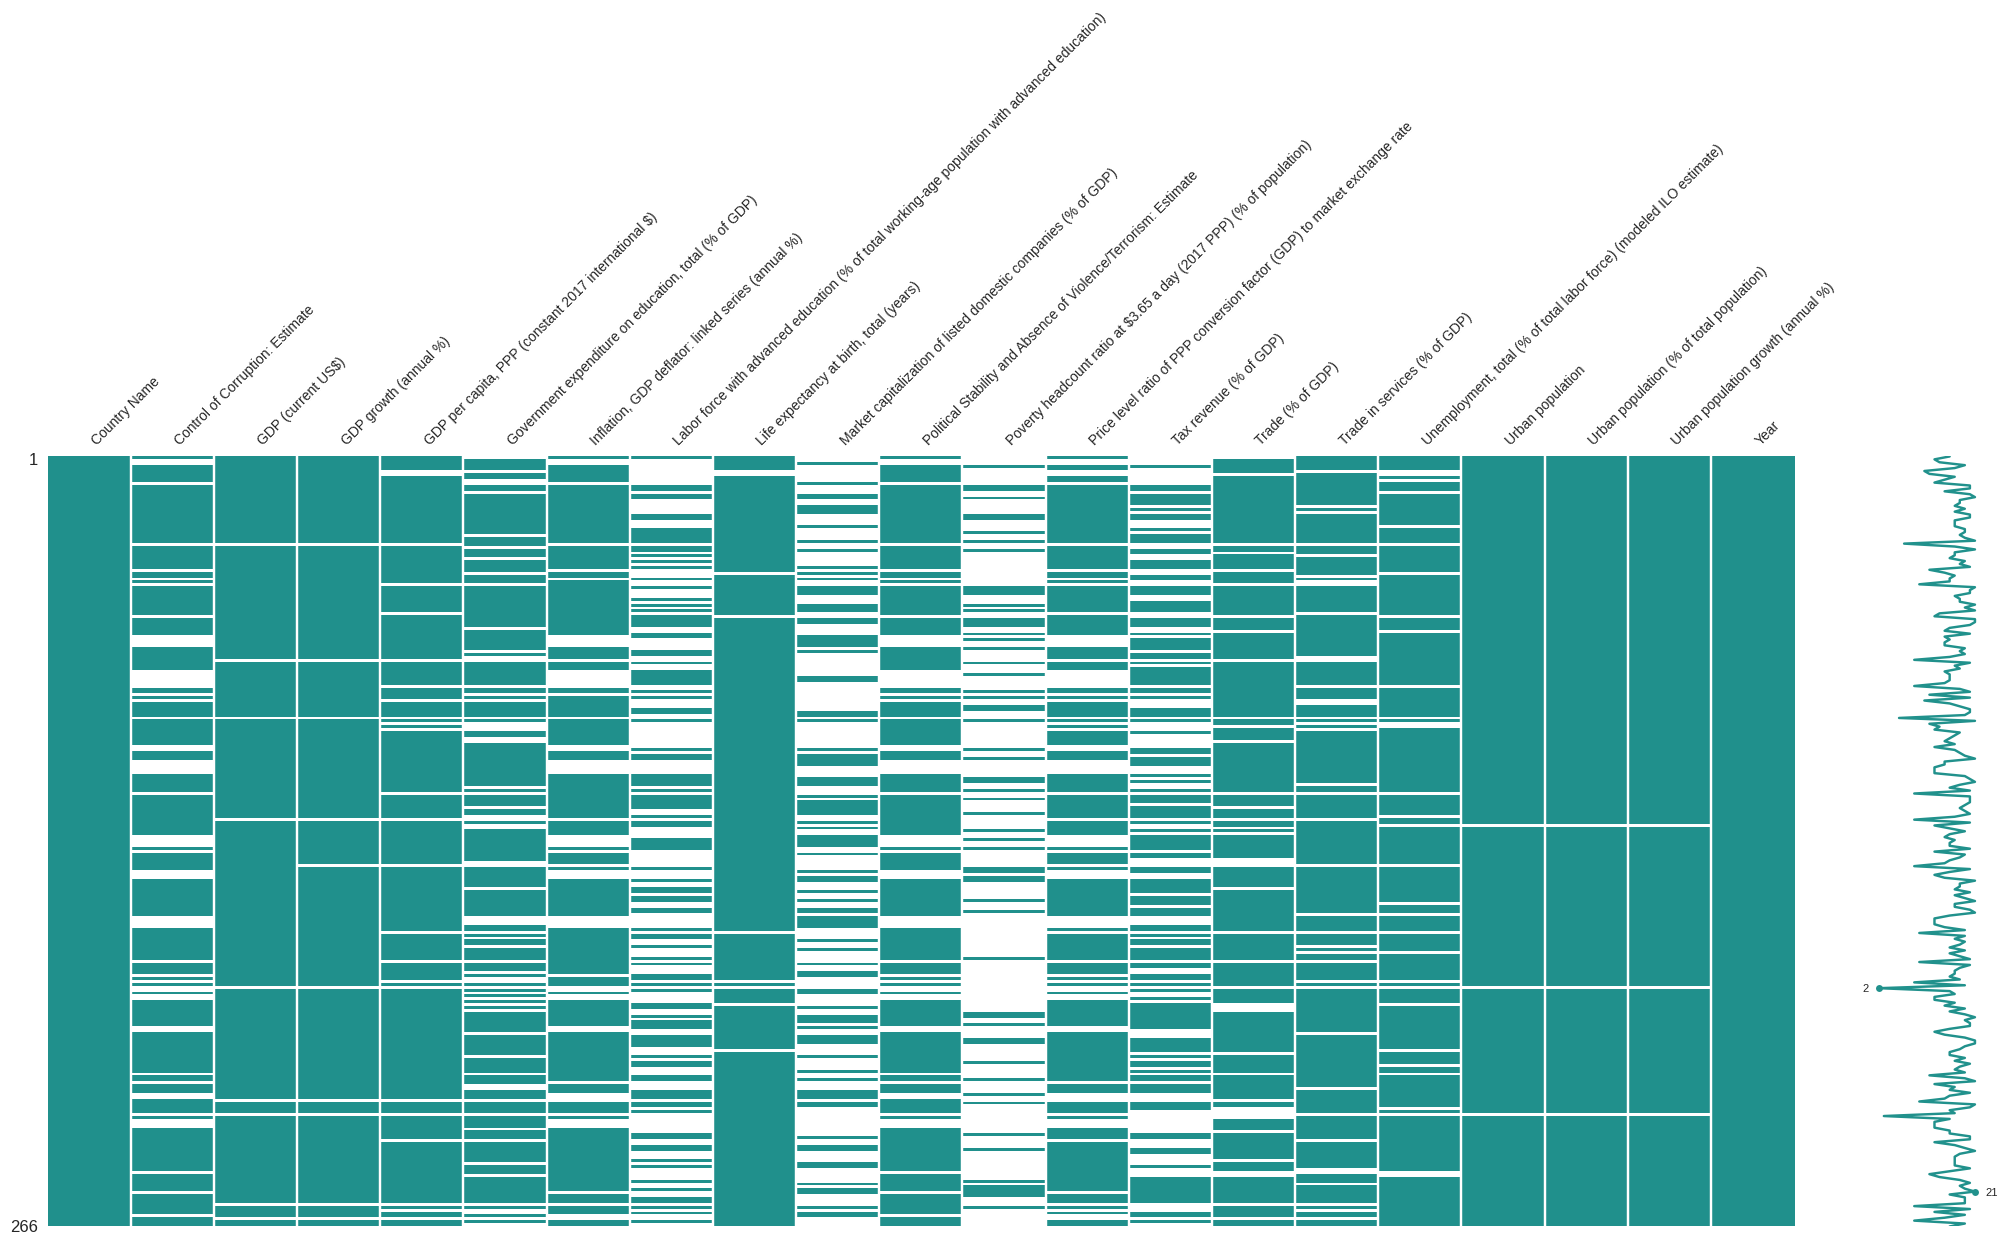

2021


2022


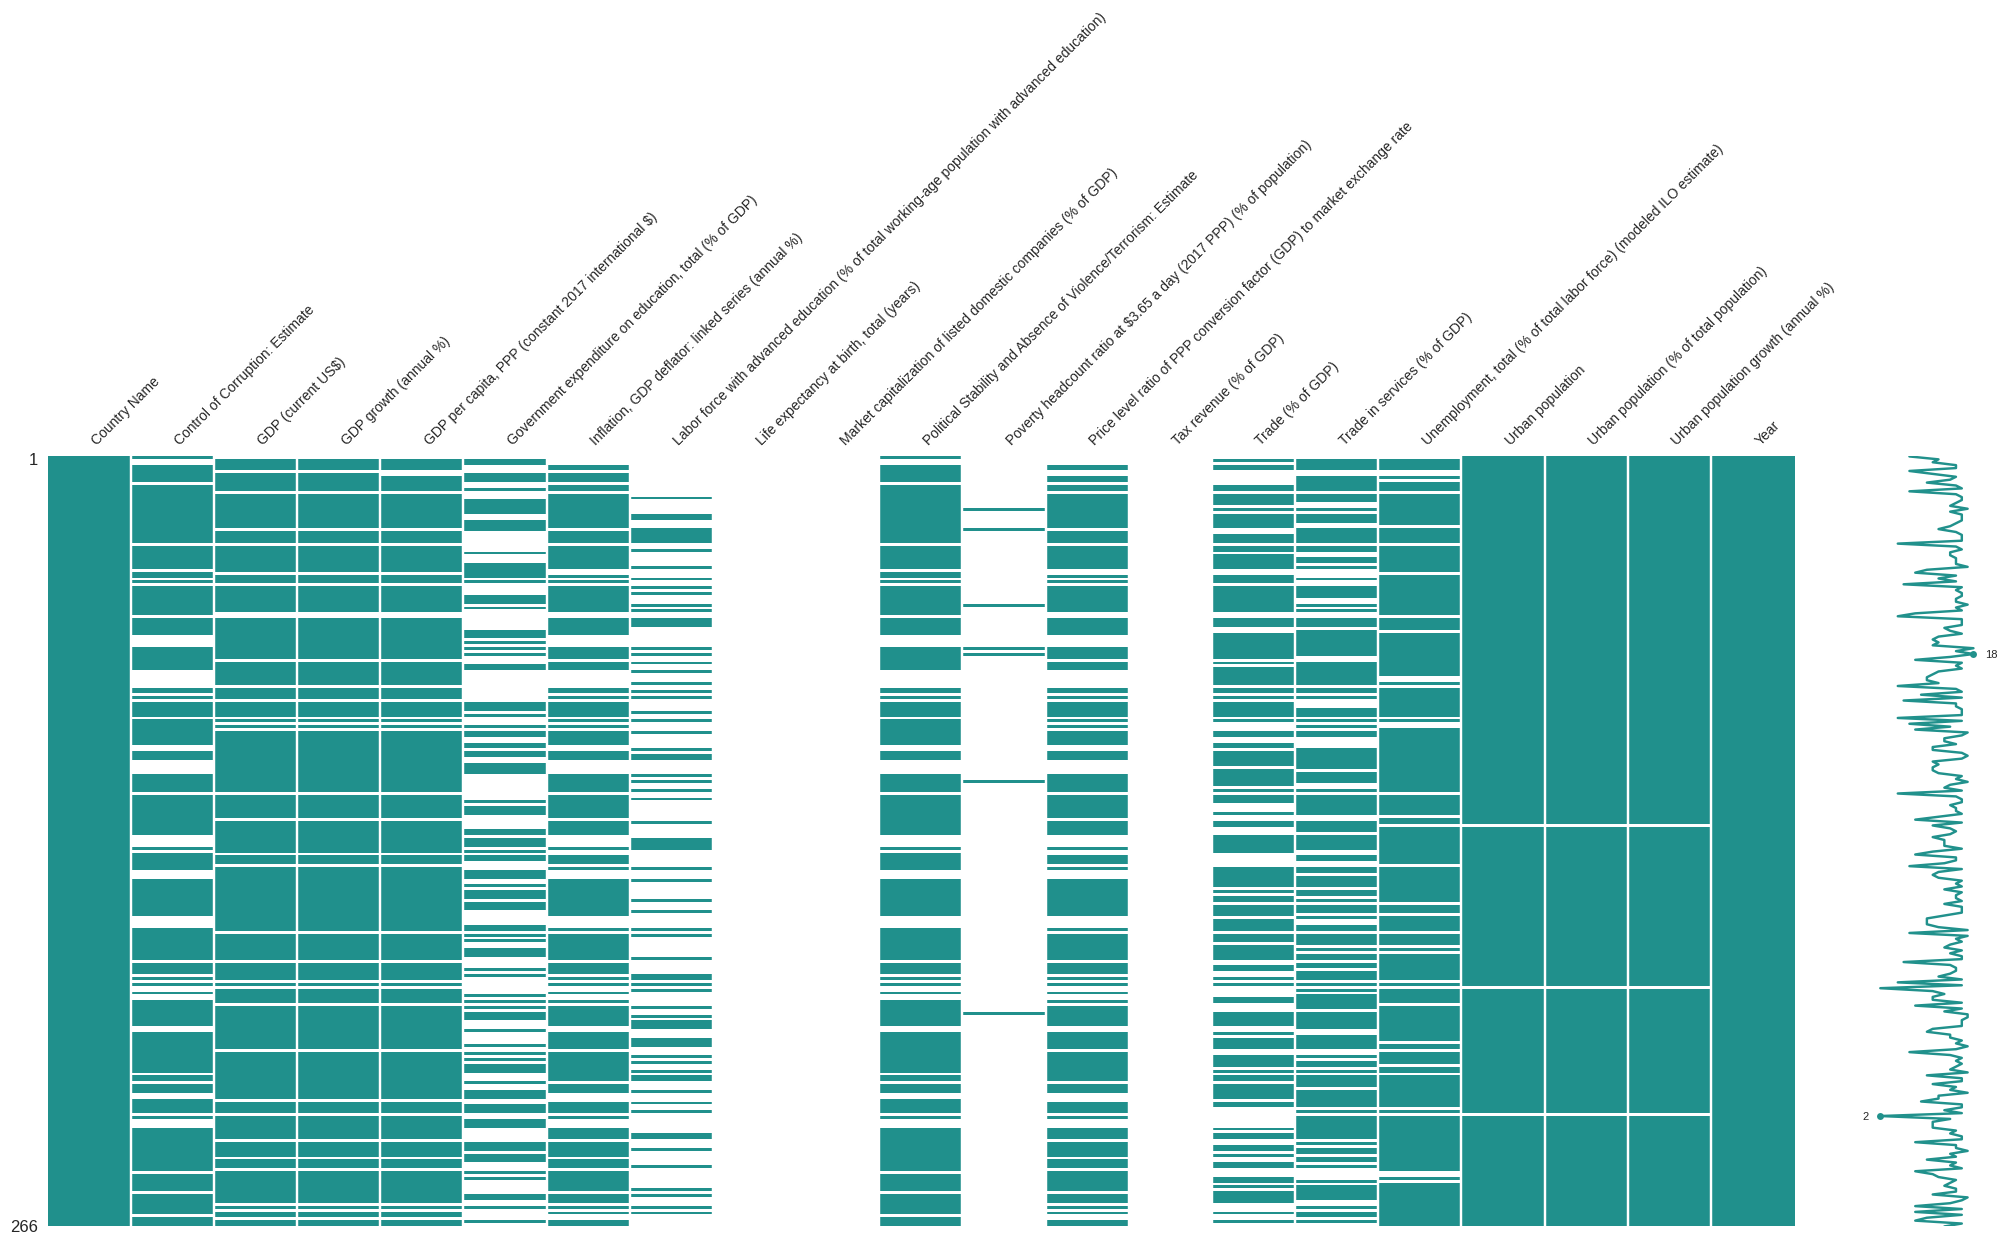

In [39]:

# Iterate over the range of years from 2018 to 2022
for year in range(2018, 2023):
    # Filter the data frame to only include rows for the current year
    df_wddyear = df_wdd[df_wdd['Year'] == year]

    # Print the current year
    print(year)

    # Plot the matrix for the current year
    ms.matrix(df_wddyear, filter=None, n=0, p=0, sort=None, figsize=(25, 10), width_ratios=(15, 1), color=(0.127568, 0.566949, 0.550556), fontsize=10, labels=None, label_rotation=45, sparkline=True, freq=None, ax=None)

    # Show the plot
    plt.show()


In [40]:
df_wdd.isnull().sum()

Series Name
Country Name                                                                                          0
Control of Corruption: Estimate                                                                     305
GDP (current US$)                                                                                    74
GDP growth (annual %)                                                                                77
GDP per capita, PPP (constant 2017 international $)                                                 131
Government expenditure on education, total (% of GDP)                                               459
Inflation, GDP deflator: linked series (annual %)                                                   321
Labor force with advanced education (% of total working-age population with advanced education)     774
Life expectancy at birth, total (years)                                                             302
Market capitalization of listed domestic companies (

Optamos por retirar o ano 2022 do dataframe, dado que há muito pouca informação das séries neste ano.

Além disso, retiramos inteiramente as colunas Market capitalization of listed domestic companies (% of GDP)' e 'Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)', pois elas também possuem muito poucas observações em todo o dataset.

Salvamos uma cópia chamada df_wdd_treated e visualizamos as últimas linhas para nos certificar de que está tudo ok e não há informações do ano de 2022.

In [41]:
# Drop rows that match the specified values in the 'Year' column
years_to_drop = [2022]
df_wdd_treated = df_wdd.drop(df_wdd[df_wdd['Year'].isin(years_to_drop)].index)

# Drop the 'Series Name' column
df_wdd_treated = df_wdd_treated.drop(columns=['Market capitalization of listed domestic companies (% of GDP)', 'Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)'])

df_wdd_treated.info()

df_wdd_treated.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Country Name                                                                                     1064 non-null   object 
 1   Control of Corruption: Estimate                                                                  820 non-null    float64
 2   GDP (current US$)                                                                                1023 non-null   float64
 3   GDP growth (annual %)                                                                            1020 non-null   float64
 4   GDP per capita, PPP (constant 2017 international $)                                              967 non-null    float64
 5   Govern

Series Name        Country Name  Control of Corruption: Estimate  \
1059         West Bank and Gaza                        -0.761420   
1060                      World                              NaN   
1061                Yemen, Rep.                        -1.668239   
1062                     Zambia                        -0.759728   
1063                   Zimbabwe                        -1.253550   

Series Name  GDP (current US$)  GDP growth (annual %)  \
1059              1.810900e+10               7.011982   
1060              9.688240e+13               6.023813   
1061                       NaN                    NaN   
1062              2.214765e+10               4.598734   
1063              2.837124e+10               8.468017   

Series Name  GDP per capita, PPP (constant 2017 international $)  \
1059                                               5641.044400     
1060                                              17055.357429     
1061                                                       NaN     
1062                                               3236.788981     
1063                                               2115.144555     

Series Name  Government expenditure on education, total (% of GDP)  \
1059                                                  5.434420       
1060                                                  4.181034       
1061                                                       NaN       
1062                                                  3.106432       
1063                                                       NaN       

Series Name  Inflation, GDP deflator: linked series (annual %)  \
1059                                                  8.953972   
1060                                                       NaN   
1061                                                       NaN   
1062                                                 27.585834   
1063                                                113.294981   

Series Name  Labor force with advanced education (% of total working-age population with advanced education)  \
1059                                                     71.78                                                 
1060                                                       NaN                                                 
1061                                                       NaN                                                 
1062                                                     79.93                                                 
1063                                                     68.13                                                 

Series Name  Life expectancy at birth, total (years)  \
1059                                       73.473000   
1060                                       71.327391   
1061                                       63.753000   
1062                                       61.223000   
1063                                       59.253000   

Series Name  Political Stability and Absence of Violence/Terrorism: Estimate  \
1059                                                 -1.836834                 
1060                                                       NaN                 
1061                                                 -2.580310                 
1062                                                  0.052348                 
1063                                                 -0.954426                 

Series Name  Price level ratio of PPP conversion factor (GDP) to market exchange rate  \
1059                                                  0.590978                          
1060                                                       NaN                          
1061                                                       NaN                          
1062                                                  0.318436                          
1063                                                  0.760043                       

Criamos nova matriz de missings para avaliar o novo dataset. Percebemos que ainda há necessidade de tratar valores ausentes todas as séries, mas há menor quantidade de valores a serem tratados.

In [42]:
ms.matrix(df_wdd_treated,color=(0.127568, 0.566949, 0.550556), fontsize=10)

<Axes: >

Como pretendemos utilizar o dataset para um modelo de aprendizado não supervisionado de classificação, e a consistência da informação é importante, vamos optar por realizar o agrupamento das informações dos cortes anuais das diversas séries pela média e obter um dataset estático ao invés de uma série temporal.

In [43]:
df_grouped=df_wdd_treated.groupby('Country Name').mean()

df_grouped = df_grouped.drop('Year', axis=1)

# Reset the index of the DataFrame and move the index values into a new column
df_grouped = df_grouped.reset_index()

# Rename the new column to the desired name
df_grouped = df_grouped.rename(columns={'index': 'Country Name'})

df_grouped.describe()

Series Name  Control of Corruption: Estimate  GDP (current US$)  \
count                             205.000000       2.580000e+02   
mean                               -0.026433       2.860918e+12   
std                                 0.997469       9.711236e+12   
min                                -1.829068       5.352034e+07   
25%                                -0.799082       1.037412e+10   
50%                                -0.187077       5.935971e+10   
75%                                 0.670725       5.636541e+11   
max                                 2.212079       8.908197e+13   

Series Name  GDP growth (annual %)  \
count                   257.000000   
mean                      1.583057   
std                       3.081592   
min                     -20.090152   
25%                       0.242009   
50%                       1.590452   
75%                       3.033333   
max                      18.333302   

Series Name  GDP per capita, PPP (constant 2017 international $)  \
count                                               242.000000     
mean                                              20531.026621     
std                                               20670.779239     
min                                                 723.882165     
25%                                                5039.829076     
50%                                               13971.263286     
75%                                               29538.296084     
max                                              114035.443488     

Series Name  Government expenditure on education, total (% of GDP)  \
count                                               218.000000       
mean                                                  4.259353       
std                                                   1.879534       
min                                                   0.252556       
25%                                                   3.101411       
50%                                                   4.088050       
75%                                                   5.219481       
max                                                  14.579624       

Series Name  Inflation, GDP deflator: linked series (annual %)  \
count                                               208.000000   
mean                                                  7.277869   
std                                                  23.158800   
min                                                  -2.468606   
25%                                                   1.739772   
50%                                                   2.866570   
75%                                                   5.133819   
max                                                 286.101268   

Series Name  Labor force with advanced education (% of total working-age population with advanced education)  \
count                                               158.000000                                                 
mean                                                 75.831770                                                 
std                                                   8.339409                                                 
min                                                  29.630000                                                 
25%                                                  72.332500                                                 
50%                                                  76.900000                                                 
75%                                                  81.141875                                                 
max                                                  92.320000                                                 

Series Name  Life expectancy at birth, total (years)  \
count                                     257.000000   
mean                                       72.096046   
std                                  

Como último recurso, iremos deletar as linhas dos países que ainda possuem valores ausentes em alguma das séries.

In [44]:
df_grouped = df_grouped.dropna()

In [45]:
ms.matrix(df_grouped,color=(0.127568, 0.566949, 0.550556), fontsize=10)

<Axes: >

A seguir, iremos renomear algumas colunas para reduzir os nomes e facilitar a visualização de informação nos gráficos.

In [46]:
print(df_grouped.columns)


Index(['Country Name', 'Control of Corruption: Estimate', 'GDP (current US$)',
       'GDP growth (annual %)',
       'GDP per capita, PPP (constant 2017 international $)',
       'Government expenditure on education, total (% of GDP)',
       'Inflation, GDP deflator: linked series (annual %)',
       'Labor force with advanced education (% of total working-age population with advanced education)',
       'Life expectancy at birth, total (years)',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Price level ratio of PPP conversion factor (GDP) to market exchange rate',
       'Tax revenue (% of GDP)', 'Trade (% of GDP)',
       'Trade in services (% of GDP)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Urban population', 'Urban population (% of total population)',
       'Urban population growth (annual %)'],
      dtype='object', name='Series Name')


In [47]:
# Renaming columns

new_column_names = {
    'Control of Corruption: Estimate': 'Corruption',
    'GDP (current US$)': 'GDP',
    'GDP growth (annual %)': 'GDP Growth',
    'GDP per capita, PPP (constant 2017 international $)': 'GDP per Capita',
    'Government expenditure on education, total (% of GDP)': 'Education Exp. (% of GDP)',
    'Inflation, GDP deflator: linked series (annual %)': 'Inflation',
    'Labor force with advanced education (% of total working-age population with advanced education)': '% Advanced Education Occupied',
    'Life expectancy at birth, total (years)': 'Life Expectancy',
    'Political Stability and Absence of Violence/Terrorism: Estimate': 'Political Stability',
    'Price level ratio of PPP conversion factor (GDP) to market exchange rate': 'PPP Conversion Ratio',
    'Tax revenue (% of GDP)': 'Tax Revenue (% of GDP)',
    'Trade (% of GDP)': 'Trade (% of GDP)',
    'Trade in services (% of GDP)': 'Trade in Services (% of GDP)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment (% of Labor Force)',
    'Urban population': 'Urban Population',
    'Urban population (% of total population)': 'Urban Population (% of Total Population)',
    'Urban population growth (annual %)': 'Urban Population Growth (%)'
}

df_grouped = df_grouped.rename(columns=new_column_names)


# Análise e Visualização dos Dados

Configurações iniciais para formatação dos gráficos

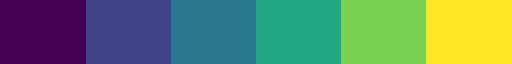

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [48]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use('seaborn')

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# plt.rcdefaults() # Restaura a configuração default

## Visualização inicial dos Dados ##

A seguir, iremos visualizar as informações com gráficos de barras horizontais em função da grande quantidade de observações (número de países) para cada atributo do dataset.

Optamos por destacar as informações do Brasil, para que possamos contextualizar um país conhecido em relação aos demais países. Isso facilita entender a contribuição de cada atributo para a classificação pretendida (estágios de desenvolvimento).

In [49]:
df_grouped.columns

Index(['Country Name', 'Corruption', 'GDP', 'GDP Growth', 'GDP per Capita',
       'Education Exp. (% of GDP)', 'Inflation',
       '% Advanced Education Occupied', 'Life Expectancy',
       'Political Stability', 'PPP Conversion Ratio', 'Tax Revenue (% of GDP)',
       'Trade (% of GDP)', 'Trade in Services (% of GDP)',
       'Unemployment (% of Labor Force)', 'Urban Population',
       'Urban Population (% of Total Population)',
       'Urban Population Growth (%)'],
      dtype='object', name='Series Name')

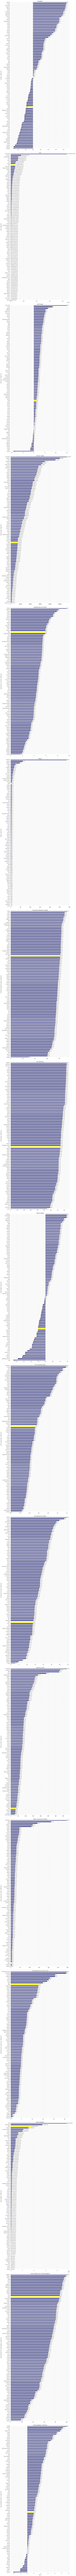

In [50]:
import locale

# Defina a localização para pt_BR
locale.setlocale(locale.LC_NUMERIC, '')

# Assuming df_grouped is your DataFrame
widths = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]  # Adjust widths based on your preference
# columns_to_plot = ['Corruption', 'GDP', 'GDP Growth', 'GDP per Capita',
#        'Education Expenditure (% of GDP)', 'Inflation',
#        'Labor Force with Advanced Education (% of Working Age Population)',
#        'Life Expectancy', 'Political Stability', 'PPP Conversion Ratio',
#        'Tax Revenue (% of GDP)', 'Trade (% of GDP)',
#        'Trade in Services (% of GDP)', 'Unemployment (% of Labor Force)',
#        'Urban Population', 'Urban Population (% of Total Population)',
#        'Urban Population Growth (%)']


columns_to_plot = ['Corruption','GDP','GDP Growth','GDP per Capita','Education Exp. (% of GDP)','Inflation',
                   '% Advanced Education Occupied','Life Expectancy','Political Stability','PPP Conversion Ratio',
                   'Tax Revenue (% of GDP)','Trade (% of GDP)','Trade in Services (% of GDP)','Unemployment (% of Labor Force)',
                   'Urban Population','Urban Population (% of Total Population)','Urban Population Growth (%)']

# # Increase space between bars
# #bar_width = 1  # Adjust the width of the bars
bar_height = 0.6  # Adjust the height to increase the space between bars

# Create subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, sum(widths)))

# Iterate through columns and create subplots
for i, col in enumerate(columns_to_plot):
    # Sort DataFrame by the current column
    df_grouped_sorted = df_grouped.sort_values(by=col)

    b1 = axs[i].barh(y=df_grouped_sorted['Country Name'], width=df_grouped_sorted[col], color=corDefault, height=bar_height)

    # Highlight 'Brazil' in yellow
    for rect, country in zip(b1.patches, df_grouped_sorted['Country Name']):
        width = rect.get_width()
        if country == 'Brazil':
            rect.set_color('yellow')

        axs[i].text(
            x=width,
            y=rect.get_y() + rect.get_height() / 2,
            s="{:,.2f}".format(rect.get_width(), grouping=True),
            ha="left",
            va="center",
            fontsize=8  # Adjust font size here
        )

    # Set title for each subplot with reduced font size
    axs[i].set_title(col, fontsize=10)

    # Set ylabel for each subplot with reduced font size
    axs[i].set_ylabel(f"{col} - Média 18-22", fontsize=8)

    # Set y-axis limits to include only the range of countries
    axs[i].set_ylim(df_grouped_sorted['Country Name'].iloc[0], df_grouped_sorted['Country Name'].iloc[-1])

    # Set font sizes for x and y axes
    axs[i].tick_params(axis='y', labelsize=8)

# Adjust the layout to use more space
fig.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.95, hspace=0.5)

# Set overall xlabel with reduced font size
plt.xlabel('Values', fontsize=8)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.style.use('seaborn')

# Save the figure
plt.savefig("subplots_highlighted_small_font.pdf")
# plt.savefig("subplots_highlighted_small_font.svg")
# plt.savefig("subplots_highlighted_small_font.png", dpi=150, format="png")

# Show the plot
plt.show()


## Insights obtidos a partir da primeira visualização ##

A seguir iremos focalizar um pouco mais a visualização em gráficos de barras horizontais, nas quais iremos comparar o Brasil com o país que representa o malor valor observado para cada atributo, isso facilitará a obtenção do panorama geral, sem ocupar tanto espaço.

A leitura de ambos os gráficos nos permite de modo a obter os seguintes insights:

**Corruption:** Dinamarca, um país conhecidamente desenvolvido é o que apresenta maior desempenho neste indicador, cuja leitura deve ser "quanto maior melhor". Já o Brasil, em comparação, está mal colocado e próximo a países conhecidamente subdesenvolvidos.

**GDP**: O GDP, visto com valores absolutos não parece ter muito a contribuir para a análise, iremos tratar deste ponto mais adiante.

**GDP Growth**: Este indicador não nos permite tirar muitas conclusões quando visto isoladamente. A impressão é que valores muito altos e muito baixos de crescimento estão associados a países subdesenvolvidos, ao passo que valores próximos da mediana estão associados a países em estágio de desenvolvimento mais avançado. Talvez tenha maior poder explicativo quando associado ao GDP per Capita.

**GDP per Capita**: Está diretamente associado a países convencionalmente classificados como desenvolvidos, Brasil está mal classificado.

**Education Exp. (% of GDP)**: Não permite uma vinculação direta com o senso comum de uma classificação como país desenvolvido. Dentre os vinte maiores gastos com educação, há países claramente subdesenvolvidos, como Namíbia, Botswana, Costa Rica, Africa do Sul e Butão. O Brasil também está neste segmento superior. Parece que o tamanho do gasto não é a única variável a ser analisada, devendo ser controlado por algum atributo que meça a qualidade do gasto e também o estágio de educação da nação.

**Inflation**: O descontrole inflacionário está claramente associado a países subdesenvolvidos. Os outliers são importantes para esse indicador, posto que a inflação bem comportada foi a regra para a maioria dos países e os outliers parecem ter poder explicativo para os países subdesenvolvidos.

**% Advanced Education Ocupied**: Mais um indicador difícil de ler, no qual há mistura de países convencionalmente chamados de desenvolvidos e subdesenvolvidos. Por exemplo, o Brasil aparece mais bem colocado do que a Suíça. Parece estar associado a possível concentração de renda nas nações subdesenvolvidas. A leitura dos clusters do modelo permitirá talvez gerar uma classificação específica considerando este indicador.

**Life Expectancy**: Está diretamente associado a países convencionalmente classificados como desenvolvidos, talvez possa ajudar a explicar diferentes clusters dentre essa classe de países. Brasil está mal classificado.

**Political Stability**: Também está diretamente associado a países convencionalmente classificados como desenvolvidos, mas há exceções notáveis, como por exemplo os Estados Unidos. Será interessante conhecer se esse indicador influenciará os clusters dentre essa classe de países desenvolvidos. Brasil está mal classificado.

**PPP Conversion Rate**: Quando baixo, parece estar associado a países subdesenvolvidos.

**Tax Revenue**: Quando alto, parece estar associado a países desenvolvidos, mas há exceções que talvez tragam grupamentos de países desenvolvidos, com baixos impostos. Assim como países subdesenvolvidos com altos impostos.

**Trade e Trade in Services**: Países menores parecem ter o indicador mais elevado.

**Unemployment**: Não permite associações claras ao estágio de desenvolvimento do país, deverá ser lido em conjunto, com base nos clusters identificados, para permitir conclusões.

**Urban Population**: Visto com valores absolutos não parece ter muito a contribuir para a análise, iremos tratar deste ponto mais adiante.

**Urban Population (% Total)**: Não permite associações claras ao estágio de desenvolvimento do país, deverá ser lido em conjunto, com base nos clusters identificados, para permitir conclusões.

**Urban Population Growth**: Altos índices parecem estar associados a países ainda muito pobres (e rurais). Faz sentido, pois países mais ricos já passaram pelo processo de urbanização e não deveriam ter taxas altas de crescimento.


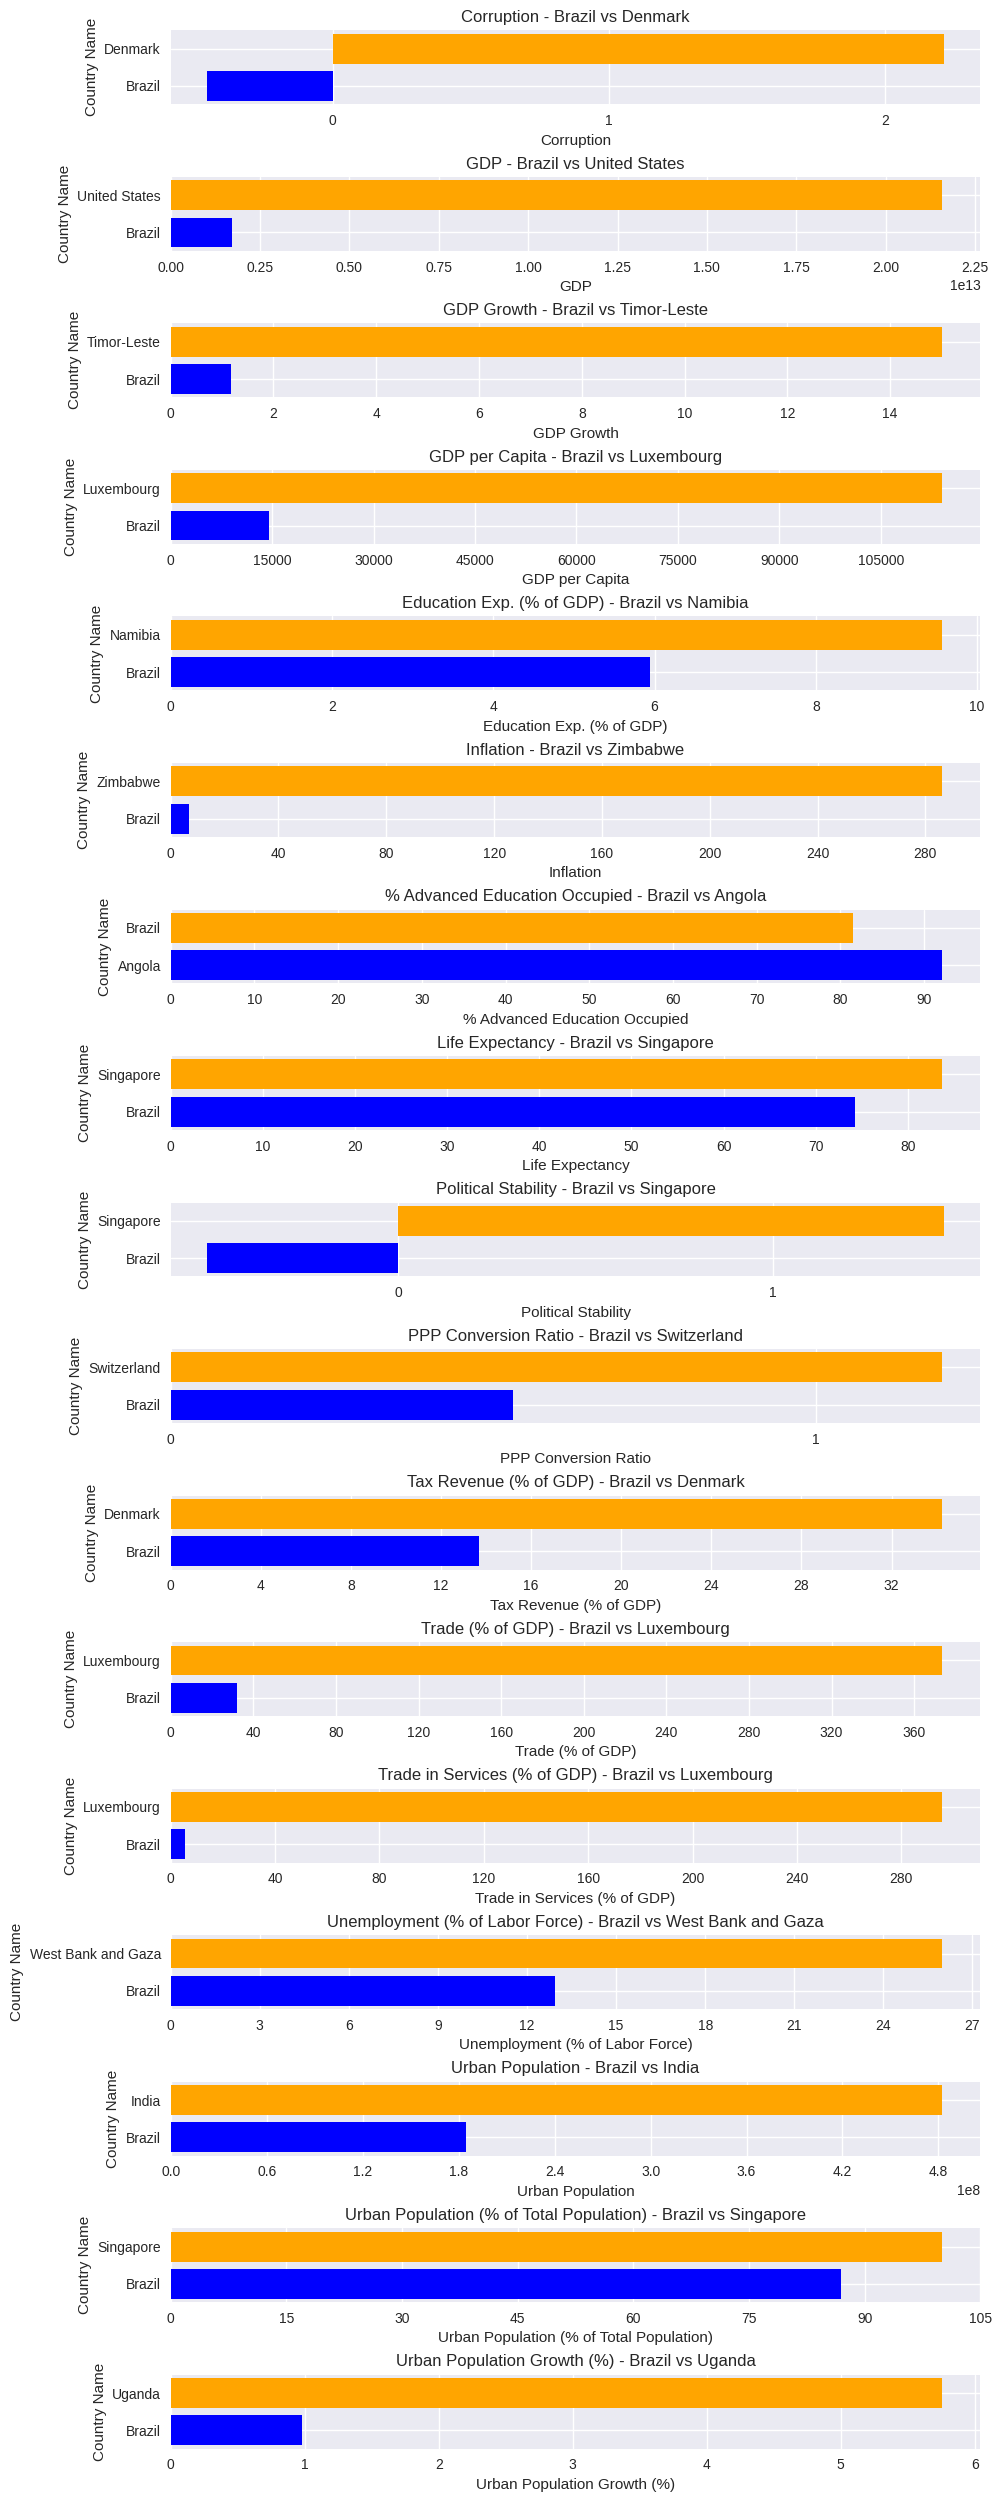

In [52]:
from matplotlib.ticker import MaxNLocator


# Supondo que 'df_grouped' seja o seu DataFrame e 'columns_to_plot' seja a lista de colunas
# Substitua 'df_grouped' e 'columns_to_plot' pelos seus dados reais

# Lista para armazenar os gráficos
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 25), sharex=False)

# Itera sobre as colunas
for i, column in enumerate(columns_to_plot):
    # Encontra o país com o maior valor para a coluna atual
    max_country = df_grouped.loc[df_grouped[column].idxmax(), 'Country Name']

    # Filtra os dados para Brasil e o país com o maior valor
    plot_data = df_grouped[df_grouped['Country Name'].isin(['Brazil', max_country])]

    # Plota gráfico horizontal de barras
    axs[i].barh(plot_data['Country Name'], plot_data[column], color=['blue', 'orange'])

    # Adiciona rótulos e título
    axs[i].set_ylabel('Country Name')
    axs[i].set_xlabel(column)
    axs[i].set_title(f'{column} - Brazil vs {max_country}')

    # Define a escala do eixo y
    axs[i].get_xaxis().set_major_locator(MaxNLocator(integer=True))

# Ajusta o layout
plt.tight_layout()
plt.show()


## Estatísticas descritivas e interpretação ##

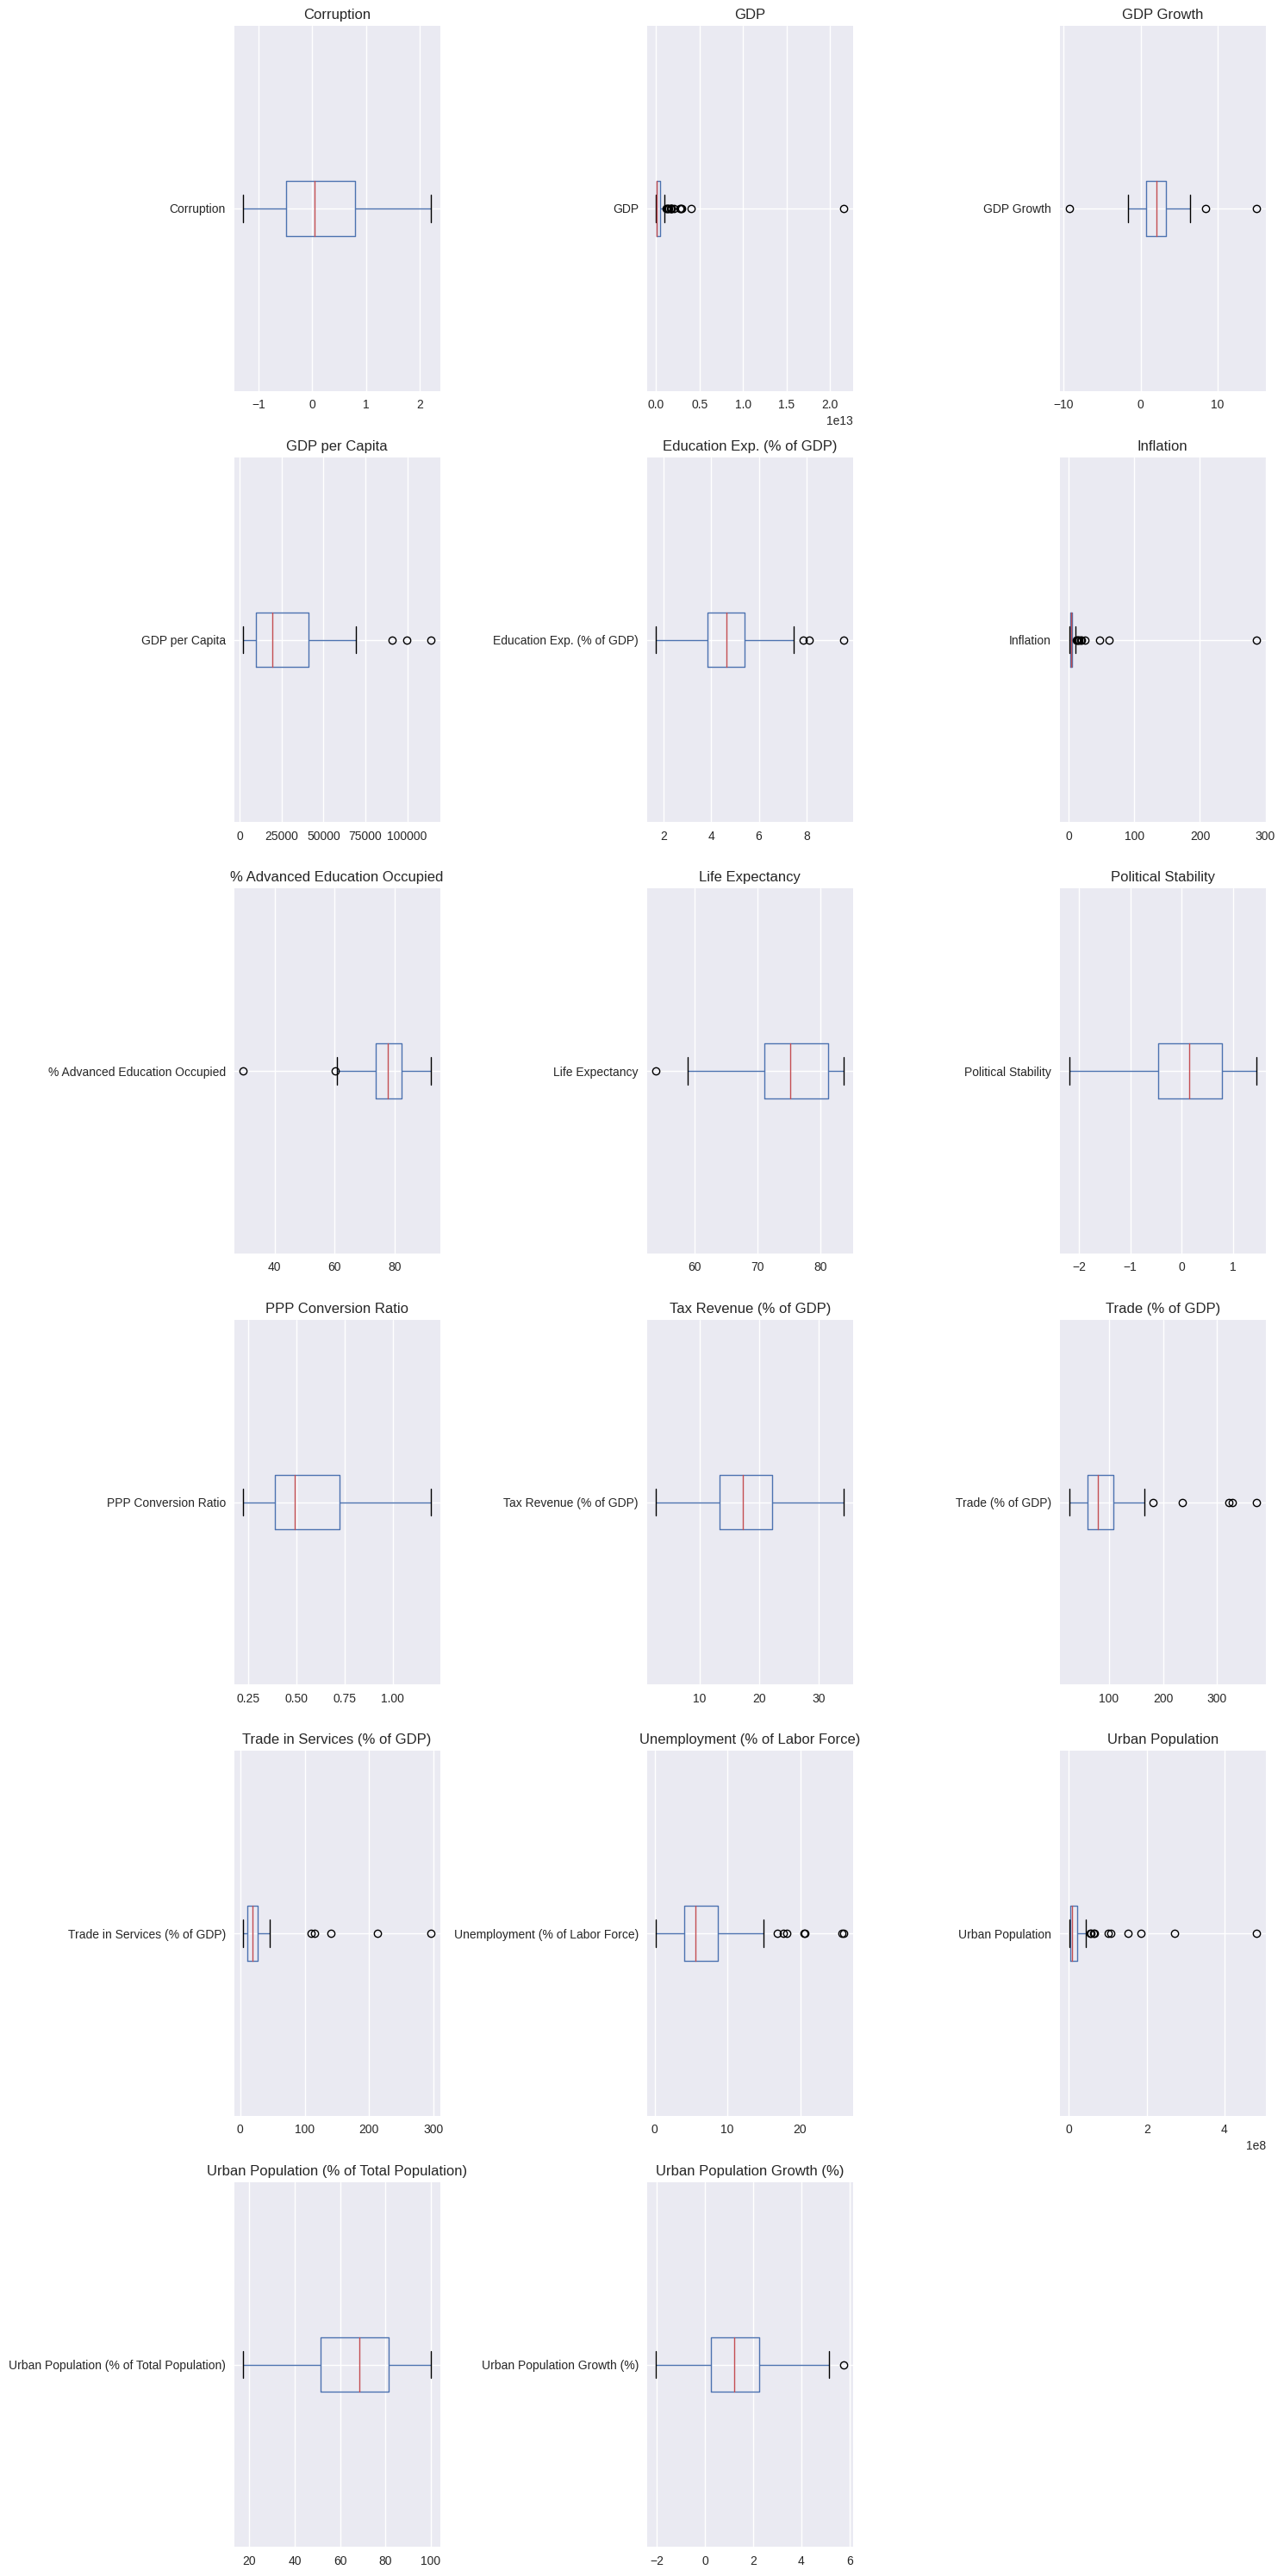

In [22]:
# Assuming df_grouped is your DataFrame
numeric_columns = df_grouped.select_dtypes(include='number').columns

# Check if there are any numeric columns
if not numeric_columns.empty:
    n_cols = len(numeric_columns)
    n_rows = int(np.ceil(n_cols / 3))  # Use ceil to round up to the nearest integer
    fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, n_rows * 5))

    # Create boxplots for each numeric column
    for i, column in enumerate(numeric_columns):
        if i < n_cols:  # Check if we haven't exceeded the number of numeric columns
            ax = axes[i // 3, i % 3]  # Calculate the correct subplot position
            df_grouped.boxplot(column=column, ax=ax, vert=False)
            ax.set_title(column)

    # Remove any extra empty subplot in the last row
    for j in range(n_cols, n_rows * 3):
        fig.delaxes(axes.flatten()[j])

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No numeric columns found for boxplot.")


In [23]:
df_grouped.describe()

Series Name  Corruption           GDP  GDP Growth  GDP per Capita  \
count         93.000000  9.300000e+01   93.000000       93.000000   
mean           0.265431  6.579224e+11    2.033837    26455.062753   
std            0.995073  2.315975e+12    2.570180    22612.984699   
min           -1.287143  9.330801e+08   -9.300192     2108.700857   
25%           -0.487805  2.612375e+10    0.685010     9376.610661   
50%            0.042306  7.856724e+10    2.016783    19439.203063   
75%            0.799104  4.287733e+11    3.320483    40747.733398   
max            2.212079  2.157240e+13   15.007367   114035.443488   

Series Name  Education Exp. (% of GDP)   Inflation  \
count                        93.000000   93.000000   
mean                          4.659351    8.318213   
std                           1.444429   30.289428   
min                           1.683590    0.122561   
25%                           3.857847    1.877475   
50%                           4.645846    3.177500   
75%                           5.396382    5.089422   
max                           9.562711  286.101268   

Series Name  % Advanced Education Occupied  Life Expectancy  \
count                            93.000000        93.000000   
mean                             76.962061        74.529969   
std                               8.022559         7.023376   
min                              29.630000        53.915250   
25%                              73.660000        71.060732   
50%                              77.777500        75.274750   
75%                              82.292500        81.224390   
max                              92.125000        83.700000   

Series Name  Political Stability  PPP Conversion Ratio  \
count                  93.000000             93.000000   
mean                    0.099705              0.570502   
std                     0.811664              0.250992   
min                    -2.194440              0.227295   
25%                    -0.451268              0.389187   
50%                     0.150456              0.491011   
75%                     0.788107              0.725346   
max                     1.457263              1.195879   

Series Name  Tax Revenue (% of GDP)  Trade (% of GDP)  \
count                     93.000000         93.000000   
mean                      17.623827         92.429402   
std                        5.977245         60.056702   
min                        2.733714         25.731873   
25%                       13.332319         59.629896   
50%                       17.343859         79.825497   
75%                       22.253996        108.223085   
max                       34.233122        373.400783   

Series Name  Trade in Services (% of GDP)  Unemployment (% of Labor Force)  \
count                           93.000000                        93.000000   
mean                            27.906579                         7.231142   
std                             40.198441                         5.027559   
min                              5.071732                         0.220250   
25%                             11.666669                         4.070000   
50%                             19.352242                         5.625000   
75%                             27.569845                         8.742500   
max                            295.495677                        25.970000   

Series Name  Urban Population  Urban Population (% of Total Population)  \
count            9.300000e+01                                 93.000000   
mean             2.572806e+07                                 65.247919   
std              6.239785e+07                                 21.124934   
min              7.847600e+04                                 17.381000   
25%              2.392903e+06                                 51.528000   
50%              7.001190e+06                                 68.607500   
75%              2.187850e+07                             

A seguir iremos plotar os histogramas das variáveis do dataframe para identificar visualmente sua distribuição.

<Figure size 800x550 with 0 Axes>

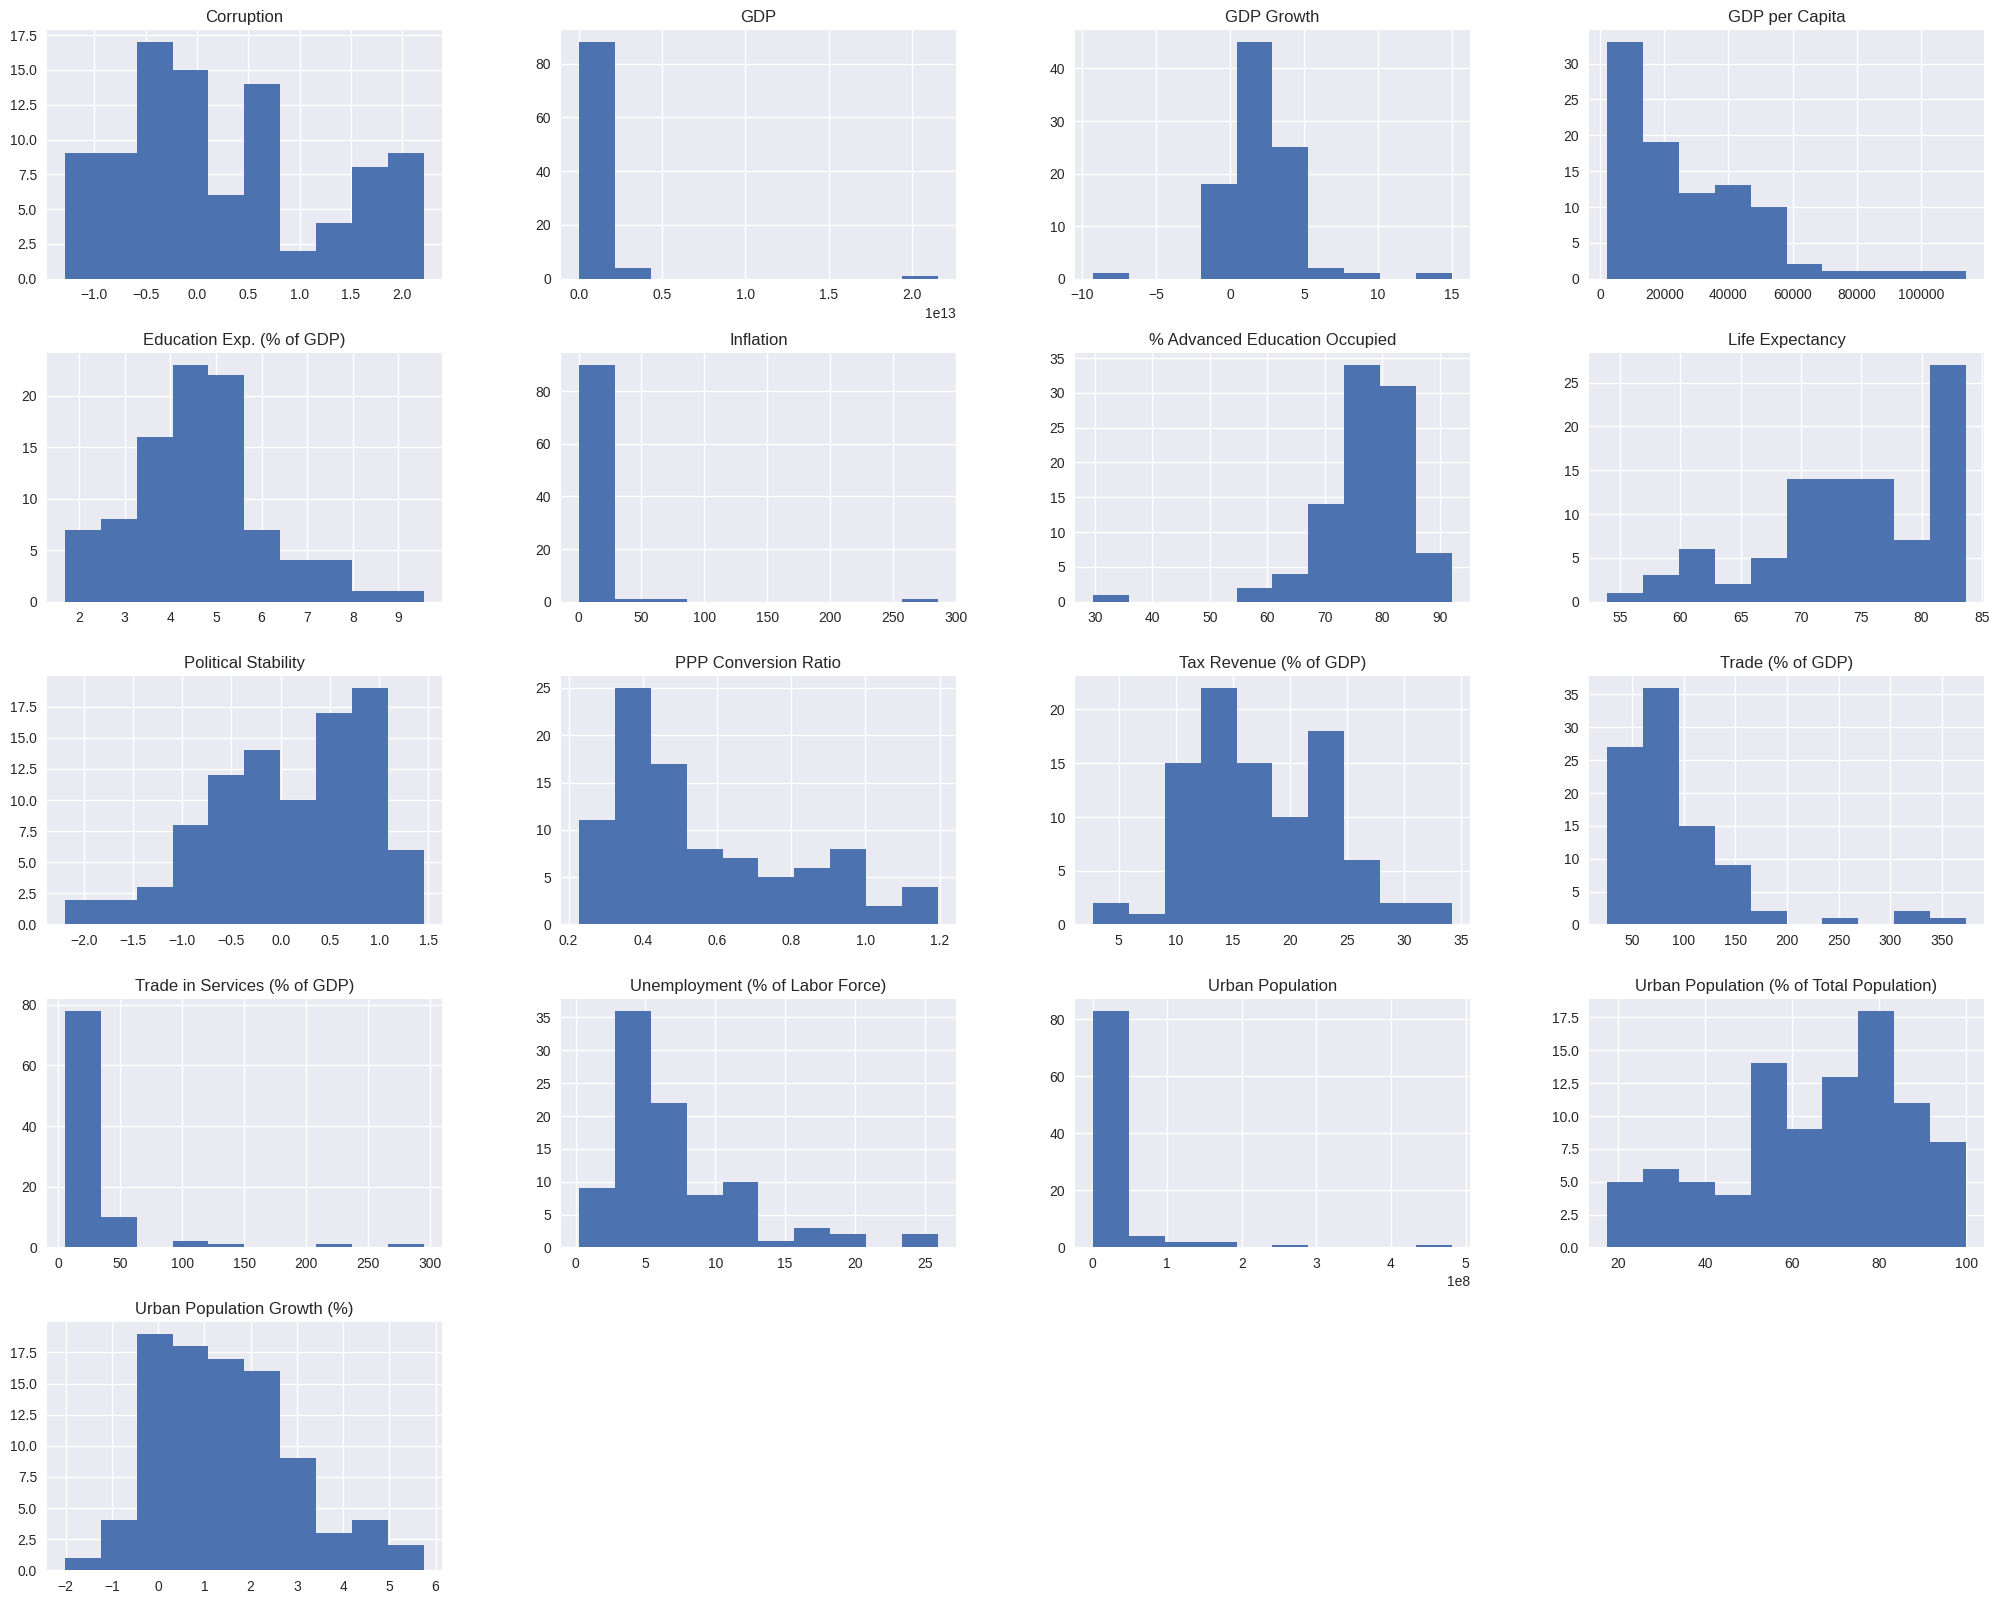

In [24]:
# Histograma
# Set the font size of the text in the plot
plt.rcParams['font.size'] = 6
plt.tight_layout()

# Generate the plot
df_grouped.hist(figsize = (25,20))

# Show the plot
plt.show()

As distribuições não parecem seguir uma função normal, percebe-se que algumas são assimétricas a direita, outras assimétricas a esquerda. Além disso, pelos gráficos de boxplot criados na etapa anterior, identificamos que algumas variantes possuem outliers muito destacados, como é o caso de "Urban Population" e "Trade in Services", o que também pode trazer um problema de escala ao modelo, especialmente para o caso do modelo KNN, que é utilizado para modelos de classificação não supervisionada, como o que propomos aplicar ao presente dataset.

In [25]:
# Assuming df_wdd_treated is your DataFrame
sns.heatmap(df_grouped.corr(), annot=False, cmap='RdBu', vmin=-1, vmax=1)
plt.show()


A análise da matriz de correlações nos faz inferir que algumas das dimensões do dataset parecem ser redundantes para o modelo, como por exemplo as variáveis "Corruption" e "GDP per Capta", que possuem correlações muito semelhantes com as demais variáveis do dataset, além de alta correlação entre si. O mesmo ocorre com "Life Expectancy" e "Political Stability".

As variáveis "GDP" e "Urban Population", vistas em sua forma absoluta, não parecem ter nenhum tipo de conexão com as demais variáveis, com correlação girando em torno de zero.

Com relação às variáveis que medem o comércio dos países, "Trade" e "Trade in Services", nota-se que são fortemente correlacionadas entre si (uma conclusão lógica).

## Preparação final dos dados para o modelo e feature selection ##

Face ao exposto na seção anterior, após a visualização de dados, e análise descritiva, decidimos por promover a redução de dimensionalidade do dataset, por meio de feature selection.

Consideramos que "GDP per Capita" e "Urban Population (% of Total Population) serão mais relevantes para a análise pretendida (clusterização dos países conforme seu nível de desenvolvimento), que as variáveis GDP e Urban Population quando observadas em valores absolutos.

Também eliminaremos a variável "Trade in Services" em favor do indicador mais abrangente "Trade", pois um é o subconjunto do outro.

In [26]:
# columns to drop
columns_to_drop = ['GDP', 'Trade in Services (% of GDP)', 'Urban Population']

# Drop the specified columns from df_grouped
df_grouped = df_grouped.drop(columns=columns_to_drop)

In [27]:
df_grouped.describe()

Series Name  Corruption  GDP Growth  GDP per Capita  \
count         93.000000   93.000000       93.000000   
mean           0.265431    2.033837    26455.062753   
std            0.995073    2.570180    22612.984699   
min           -1.287143   -9.300192     2108.700857   
25%           -0.487805    0.685010     9376.610661   
50%            0.042306    2.016783    19439.203063   
75%            0.799104    3.320483    40747.733398   
max            2.212079   15.007367   114035.443488   

Series Name  Education Exp. (% of GDP)   Inflation  \
count                        93.000000   93.000000   
mean                          4.659351    8.318213   
std                           1.444429   30.289428   
min                           1.683590    0.122561   
25%                           3.857847    1.877475   
50%                           4.645846    3.177500   
75%                           5.396382    5.089422   
max                           9.562711  286.101268   

Series Name  % Advanced Education Occupied  Life Expectancy  \
count                            93.000000        93.000000   
mean                             76.962061        74.529969   
std                               8.022559         7.023376   
min                              29.630000        53.915250   
25%                              73.660000        71.060732   
50%                              77.777500        75.274750   
75%                              82.292500        81.224390   
max                              92.125000        83.700000   

Series Name  Political Stability  PPP Conversion Ratio  \
count                  93.000000             93.000000   
mean                    0.099705              0.570502   
std                     0.811664              0.250992   
min                    -2.194440              0.227295   
25%                    -0.451268              0.389187   
50%                     0.150456              0.491011   
75%                     0.788107              0.725346   
max                     1.457263              1.195879   

Series Name  Tax Revenue (% of GDP)  Trade (% of GDP)  \
count                     93.000000         93.000000   
mean                      17.623827         92.429402   
std                        5.977245         60.056702   
min                        2.733714         25.731873   
25%                       13.332319         59.629896   
50%                       17.343859         79.825497   
75%                       22.253996        108.223085   
max                       34.233122        373.400783   

Series Name  Unemployment (% of Labor Force)  \
count                              93.000000   
mean                                7.231142   
std                                 5.027559   
min                                 0.220250   
25%                                 4.070000   
50%                                 5.625000   
75%                                 8.742500   
max                                25.970000   

Series Name  Urban Population (% of Total Population)  \
count                                       93.000000   
mean                                        65.247919   
std                                         21.124934   
min                                         17.381000   
25%                                         51.528000   
50%                                         68.607500   
75%                                         81.429250   
max                                        100.000000   

Series Name  Urban Population Growth (%)  
count                          93.000000  
mean                            1.440577  
std                             1.481866  
min                            -2.021839  
25%                             0.253922  
50%                             1.217396  
75%                             2.266019  
max                             5.754522

Iremos também realizar uma transformação logarítmica nas variáveis Inflation, GDP per Capta e Trade para que o intervalo de valores não seja tão elevado. E, por fim, fazer a normalização dos dados, que é a técnica aplicável nos casos em que não se observa distribuições normais nas variáveis.

Não iremos utilizar a técnica de holdout, uma vez que a proposta do trabalho é realizar uma classificação não supervisionada, na qual não é possível testar os rótulos.

In [28]:
# Apply logarithmic transformation
columns_to_log_transform = ['Inflation', 'GDP per Capita', 'Trade (% of GDP)']
df_grouped[columns_to_log_transform] = df_grouped[columns_to_log_transform].apply(np.log1p)


In [29]:
# Seleciona todas as colunas numéricas
colunas_numericas = df_grouped.select_dtypes(include=['float64', 'int64']).columns

# Inicializa o MinMaxScaler
scaler = MinMaxScaler()

# Ajusta o scaler e transforma todas as colunas numéricas
df_grouped[colunas_numericas] = scaler.fit_transform(df_grouped[colunas_numericas])

# Agora, todas as colunas numéricas do DataFrame 'df_grouped' estão normalizadas


In [30]:
df_grouped.describe()

Series Name  Corruption  GDP Growth  GDP per Capita  \
count         93.000000   93.000000       93.000000   
mean           0.443691    0.466276        0.526506   
std            0.284370    0.105736        0.257717   
min            0.000000    0.000000        0.000000   
25%            0.228433    0.410786        0.373882   
50%            0.379927    0.465574        0.556595   
75%            0.596203    0.519208        0.742080   
max            1.000000    1.000000        1.000000   

Series Name  Education Exp. (% of GDP)  Inflation  \
count                        93.000000  93.000000   
mean                          0.377677   0.259980   
std                           0.183324   0.146197   
min                           0.000000   0.000000   
25%                           0.275952   0.169780   
50%                           0.375963   0.237022   
75%                           0.471219   0.304991   
max                           1.000000   1.000000   

Series Name  % Advanced Education Occupied  Life Expectancy  \
count                            93.000000        93.000000   
mean                              0.757374         0.692123   
std                               0.128371         0.235804   
min                               0.000000         0.000000   
25%                               0.704536         0.575646   
50%                               0.770422         0.717129   
75%                               0.842667         0.916883   
max                               1.000000         1.000000   

Series Name  Political Stability  PPP Conversion Ratio  \
count                  93.000000             93.000000   
mean                    0.628240              0.354339   
std                     0.222270              0.259133   
min                     0.000000              0.000000   
25%                     0.477359              0.167143   
50%                     0.642138              0.272270   
75%                     0.816755              0.514206   
max                     1.000000              1.000000   

Series Name  Tax Revenue (% of GDP)  Trade (% of GDP)  \
count                     93.000000         93.000000   
mean                       0.472711          0.419232   
std                        0.189757          0.195740   
min                        0.000000          0.000000   
25%                        0.336470          0.310264   
50%                        0.463823          0.419189   
75%                        0.619703          0.533265   
max                        1.000000          1.000000   

Series Name  Unemployment (% of Labor Force)  \
count                              93.000000   
mean                                0.272270   
std                                 0.195247   
min                                 0.000000   
25%                                 0.149506   
50%                                 0.209895   
75%                                 0.330964   
max                                 1.000000   

Series Name  Urban Population (% of Total Population)  \
count                                       93.000000   
mean                                         0.579369   
std                                          0.255691   
min                                          0.000000   
25%                                          0.413307   
50%                                          0.620033   
75%                                          0.775224   
max                                          1.000000   

Series Name  Urban Population Growth (%)  
count                          93.000000  
mean                            0.445249  
std                             0.190560  
min                             0.000000  
25%                             0.292651  
50%                             0.416549  
75%                             0.551396  
max                             1.000000